In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import networkx as nx
import numpy as np
import os

In [ ]:
#we are going to read the tube network from the shape file
#first, check current directory
os.getcwd()

In [2]:
# You need to set the working directory to where you have your shapefile data
os.chdir('C:\\Users\\Elena\\OneDrive - University College London\\CASA_2020\\modules\\ur_sim\\week10\\TubeCommuters_Practical\\underground')

# Let's create a graph from the shapefile
g_shp=nx.read_shp('underground.shp',geom_attrs=False)

# We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(g_shp)
df[0:10]

,source,target,station_1,distance,toid_seq,ShpName,station_2_,station_2,station_1_
0,"(-0.1571, 51.5226)","(-0.1631, 51.5225)",11,416.586050,1,underground,Marylebone,163,Baker Street
1,"(-0.1571, 51.5226)","(-0.1466, 51.5234)",11,734.173636,2,underground,Regent's Park,212,Baker Street
2,"(-0.1571, 51.5226)","(-0.17, 51.5203)",11,931.211577,171,underground,Edgware Road (C),83,Baker Street
3,"(-0.1571, 51.5226)","(-0.1439, 51.5238)",11,925.826411,225,underground,Great Portland Street,104,Baker Street
4,"(-0.1571, 51.5226)","(-0.1494, 51.5142)",11,1076.607648,197,underground,Bond Street,28,Baker Street
5,"(-0.1571, 51.5226)","(-0.174, 51.5347)",11,1785.442777,198,underground,St. John's Wood,249,Baker Street
6,"(-0.1571, 51.5226)","(-0.1803, 51.5472)",11,3175.274183,226,underground,Finchley Road,94,Baker Street
7,"(-0.1247, 51.508)","(-0.1223, 51.5074)",49,179.503418,277,underground,Embankment,87,Charing Cross
8,"(-0.1247, 51.508)","(-0.1342, 51.5098)",49,689.289845,4,underground,Picadilly Circus,197,Charing Cross
9,"(-0.1247, 51.508)","(-0.1281, 51.5113)",49,436.484594,278,underground,Leicester Square,151,Charing Cross


In [3]:
#we will need to add station names as attributes of the nodes:
nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1_')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2_')}
#nod_all = {**nod_st1, **nod_st2} #for python 3.5 and greater

#In Python 2, (or 3.4 or lower) write a function
nod_all = nod_st1.copy()   # start with x's keys and values
nod_all.update(nod_st2)

nx.set_node_attributes(g_shp,nod_all,'station')

# get the nodes attributes:
list(g_shp.nodes(data=True))[0:10]

[((-0.1571, 51.5226), {'station': 'Baker Street'}),
 ((-0.1631, 51.5225), {'station': 'Marylebone'}),
 ((-0.1466, 51.5234), {'station': "Regent's Park"}),
 ((-0.1247, 51.508), {'station': 'Charing Cross'}),
 ((-0.1223, 51.5074), {'station': 'Embankment'}),
 ((-0.1342, 51.5098), {'station': 'Picadilly Circus'}),
 ((-0.1679, 51.5199), {'station': 'Edgware Road (B)'}),
 ((-0.1755, 51.5154), {'station': 'Paddington'}),
 ((-0.1001, 51.4943), {'station': 'Elephant & Castle'}),
 ((-0.1115, 51.4991), {'station': 'Lambeth North'})]

In [4]:
#do we want this graph to be a directed one? In fact, only a few links in the dataset are directed

# We can transform the type of graph from directed to undirected using the following function:
g_shp_un = g_shp.to_undirected()

#Finally, we will give an ID to each node(station), such that it will be easier later to call them:
#1.Create a new attribute with node coordinates (now coord are the keys and we do not want to lose that information
nod_coord = {(e1):e1 for e1 in g_shp_un.nodes()}
nx.set_node_attributes(g_shp_un,nod_coord,'station_coord')
list(g_shp_un.nodes(data=True))[0:10]

[((-0.1571, 51.5226),
  {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226)}),
 ((-0.1631, 51.5225),
  {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225)}),
 ((-0.1466, 51.5234),
  {'station': "Regent's Park", 'station_coord': (-0.1466, 51.5234)}),
 ((-0.1247, 51.508),
  {'station': 'Charing Cross', 'station_coord': (-0.1247, 51.508)}),
 ((-0.1223, 51.5074),
  {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074)}),
 ((-0.1342, 51.5098),
  {'station': 'Picadilly Circus', 'station_coord': (-0.1342, 51.5098)}),
 ((-0.1679, 51.5199),
  {'station': 'Edgware Road (B)', 'station_coord': (-0.1679, 51.5199)}),
 ((-0.1755, 51.5154),
  {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154)}),
 ((-0.1001, 51.4943),
  {'station': 'Elephant & Castle', 'station_coord': (-0.1001, 51.4943)}),
 ((-0.1115, 51.4991),
  {'station': 'Lambeth North', 'station_coord': (-0.1115, 51.4991)})]

In [5]:
#2.now relabel each node with an ordered integer:
node_list = list(g_shp_un.nodes())
mapping = {node_list[i]:i for i in range(len(node_list))}
g_shp_un = nx.relabel_nodes(g_shp_un, mapping)
list(g_shp_un.nodes(data=True))[0:10]

[(0, {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226)}),
 (1, {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225)}),
 (2, {'station': "Regent's Park", 'station_coord': (-0.1466, 51.5234)}),
 (3, {'station': 'Charing Cross', 'station_coord': (-0.1247, 51.508)}),
 (4, {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074)}),
 (5, {'station': 'Picadilly Circus', 'station_coord': (-0.1342, 51.5098)}),
 (6, {'station': 'Edgware Road (B)', 'station_coord': (-0.1679, 51.5199)}),
 (7, {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154)}),
 (8, {'station': 'Elephant & Castle', 'station_coord': (-0.1001, 51.4943)}),
 (9, {'station': 'Lambeth North', 'station_coord': (-0.1115, 51.4991)})]

In [6]:
#2.Rename it with the name given by the the commuters file (see later):
g_shp_un.nodes[258]['station']='Heathrow Terminals 123'

In [7]:
orig_dest = pd.read_csv("C:/Users/Elena/OneDrive - University College London/CASA_2020/modules/ur_sim/underground/ODtube2017.csv")
orig_dest

,From,station_name,To,station_name.1,total_wtrips
0,500,Acton Town,505,Alperton,143
1,500,Acton Town,506,Amersham,22
2,500,Acton Town,507,Angel,15
3,500,Acton Town,508,Archway,9
4,500,Acton Town,510,Arsenal,9
...,...,...,...,...,...
34053,771,Woodside Park,747,Waterloo,93
34054,771,Woodside Park,755,West Brompton,0
34055,771,Woodside Park,756,West Finchley,34
34056,771,Woodside Park,761,Westminster,51


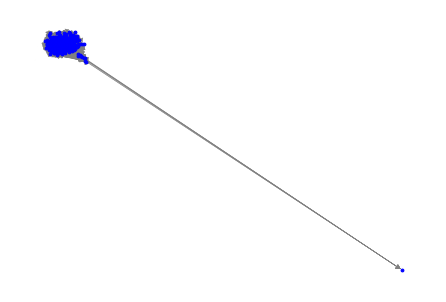

In [8]:
g_OD = nx.from_pandas_edgelist(orig_dest, 'station_name', 'station_name.1',['total_wtrips'], create_using=nx.MultiDiGraph)

# Plot graph
nx.draw(g_OD,
        node_color='b',
        node_size=8,
        edge_color='gray',
        width=0.4)

In [9]:
#Change the names of nodes by the id in g_shp_un (tube network):

#1.Copy name as an attribute:
nod_names={(e1):e1 for e1 in g_OD.nodes()}
nx.set_node_attributes(g_OD,nod_names,'station') #with nod_id1 or nod_id2 is enought
print(list(g_OD.nodes(data=True))[:10])

[('Acton Town', {'station': 'Acton Town'}), ('Alperton', {'station': 'Alperton'}), ('Amersham', {'station': 'Amersham'}), ('Angel', {'station': 'Angel'}), ('Archway', {'station': 'Archway'}), ('Arsenal', {'station': 'Arsenal'}), ('Baker Street', {'station': 'Baker Street'}), ('Bank', {'station': 'Bank'}), ('Barbican', {'station': 'Barbican'}), ('Barons Court', {'station': 'Barons Court'})]


In [10]:
#2.Do the mapping with id in g_shp_un
mapping = {g_shp_un.nodes[i]['station']:i for i in g_shp_un.nodes()}
g_OD = nx.relabel_nodes(g_OD, mapping)
print(list(g_OD.nodes(data=True))[:10])

[(111, {'station': 'Acton Town'}), (238, {'station': 'Alperton'}), (172, {'station': 'Amersham'}), (196, {'station': 'Angel'}), (198, {'station': 'Archway'}), (244, {'station': 'Arsenal'}), (0, {'station': 'Baker Street'}), (25, {'station': 'Bank'}), (77, {'station': 'Barbican'}), (100, {'station': 'Barons Court'})]


In [11]:
#and we can add coodenates to the nodes, from the shapefile of the tube network:
nod_coords={(e1):coord for e1, coord in g_shp_un.nodes(data='station_coord')}

nx.set_node_attributes(g_OD,nod_coords,'station_coord') #with nod_id1 or nod_id2 is enought

pos = {e1: xy for e1,xy in g_OD.nodes(data='station_coord')}

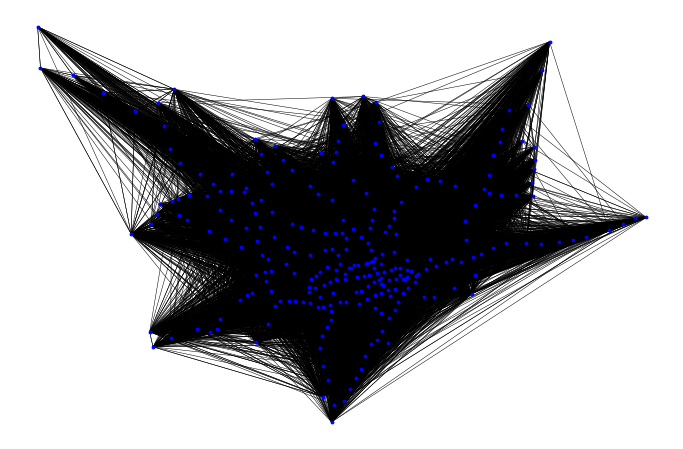

In [12]:
#To finaly plot the OD matrix as a network:
fig, ax = plt.subplots(figsize=(12,8))

nx.draw_networkx_nodes(g_OD,g_OD.nodes(data='station_coord'),node_size=8,node_color='b')
nx.draw_networkx_edges(g_OD,pos,arrows=False,width=0.5)
plt.axis("off")
plt.show()

In [48]:
df1 = nx.to_pandas_edgelist(g_OD)
df1

,source,target,total_wtrips
0,111,238,143
1,111,172,22
2,111,196,15
3,111,198,9
4,111,244,9
...,...,...,...
34053,129,10,29
34054,129,118,2
34055,129,109,24
34056,129,86,1


In [14]:
#First we create an empty adjacency matrix:
N=len(g_shp_un.nodes()) #As we are going to use shortest path in the tube network, N is from g_shp_un
adj_c=np.zeros((N, N))

#Fill the adjacency matrix with Origin-Destination flows:
for e1,e2 in g_OD.edges():
    path = nx.dijkstra_path_length(g_shp_un,e1,e2, weight='distance')  
    adj_c[e1,e2]=path

In [15]:
adj_c

array([[   0.        ,  416.58605041,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 416.58605041,    0.        , 1150.75968657, ...,    0.        ,
           0.        ,    0.        ],
       [ 734.17363616, 1150.75968657,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [16]:
g_flows=nx.from_numpy_matrix(adj_c, create_using=nx.DiGraph)

In [17]:
#we need to give coordinates to these nodes too:
nod_coord = {(e1):coord for e1,coord in g_shp_un.nodes(data='station_coord')}
nx.set_node_attributes(g_flows,nod_coord,'station_coord')
list(g_flows.nodes(data=True))[0:10]

[(0, {'station_coord': (-0.1571, 51.5226)}),
 (1, {'station_coord': (-0.1631, 51.5225)}),
 (2, {'station_coord': (-0.1466, 51.5234)}),
 (3, {'station_coord': (-0.1247, 51.508)}),
 (4, {'station_coord': (-0.1223, 51.5074)}),
 (5, {'station_coord': (-0.1342, 51.5098)}),
 (6, {'station_coord': (-0.1679, 51.5199)}),
 (7, {'station_coord': (-0.1755, 51.5154)}),
 (8, {'station_coord': (-0.1001, 51.4943)}),
 (9, {'station_coord': (-0.1115, 51.4991)})]

In [18]:
#also the station names:
nod_names = {(e1):name for e1,name in g_shp_un.nodes(data='station')}
nx.set_node_attributes(g_flows,nod_names,'station')
list(g_flows.nodes(data=True))[0:10]

[(0, {'station_coord': (-0.1571, 51.5226), 'station': 'Baker Street'}),
 (1, {'station_coord': (-0.1631, 51.5225), 'station': 'Marylebone'}),
 (2, {'station_coord': (-0.1466, 51.5234), 'station': "Regent's Park"}),
 (3, {'station_coord': (-0.1247, 51.508), 'station': 'Charing Cross'}),
 (4, {'station_coord': (-0.1223, 51.5074), 'station': 'Embankment'}),
 (5, {'station_coord': (-0.1342, 51.5098), 'station': 'Picadilly Circus'}),
 (6, {'station_coord': (-0.1679, 51.5199), 'station': 'Edgware Road (B)'}),
 (7, {'station_coord': (-0.1755, 51.5154), 'station': 'Paddington'}),
 (8, {'station_coord': (-0.1001, 51.4943), 'station': 'Elephant & Castle'}),
 (9, {'station_coord': (-0.1115, 51.4991), 'station': 'Lambeth North'})]

In [19]:
#as edges are saved using the IDs, let us create an edges attribute with the station names:
edges_names={(e1,e2):(g_flows.nodes[e1]['station'],g_flows.nodes[e2]['station']) for e1,e2 in g_flows.edges()}

nx.set_edge_attributes(g_flows,edges_names,'station_names') 
print(list(g_flows.edges(data=True))[0:10])

[(0, 1, {'weight': 416.586050414, 'station_names': ('Baker Street', 'Marylebone')}), (0, 3, {'weight': 3090.5913264700002, 'station_names': ('Baker Street', 'Charing Cross')}), (0, 4, {'weight': 3270.094744158, 'station_names': ('Baker Street', 'Embankment')}), (0, 5, {'weight': 2401.301481116, 'station_names': ('Baker Street', 'Picadilly Circus')}), (0, 6, {'weight': 857.8041545460001, 'station_names': ('Baker Street', 'Edgware Road (B)')}), (0, 7, {'weight': 1585.1039066090002, 'station_names': ('Baker Street', 'Paddington')}), (0, 8, {'weight': 5460.195211592, 'station_names': ('Baker Street', 'Elephant & Castle')}), (0, 9, {'weight': 4505.233659622, 'station_names': ('Baker Street', 'Lambeth North')}), (0, 10, {'weight': 3968.146204336, 'station_names': ('Baker Street', 'Waterloo')}), (0, 12, {'weight': 10343.950661395002, 'station_names': ('Baker Street', 'Stonebridge Park')})]


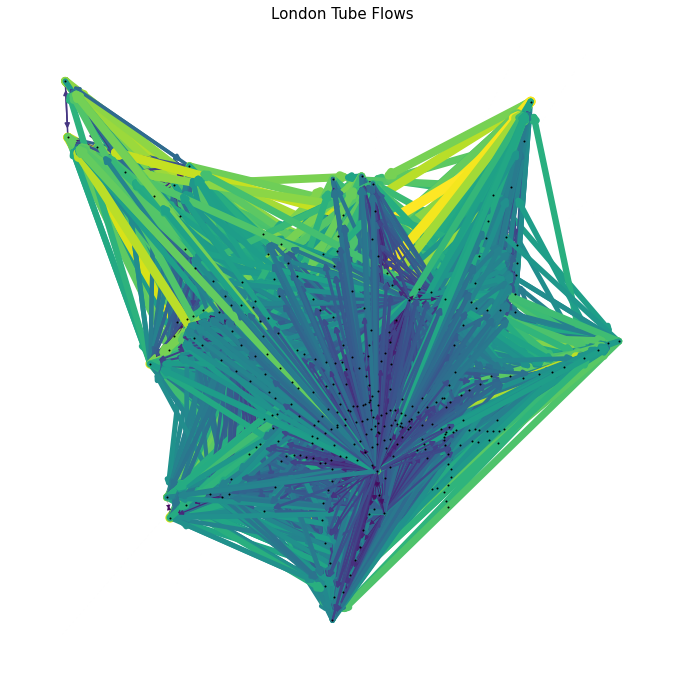

In [20]:
# Lets set colour and size of nodes according to the flows_
weights = [w for e1,e2,w in g_flows.edges(data='weight')]

weights_color=[(w/max(weights)) for e1,e2,w in g_flows.edges(data='weight')]
weights_size=[(w/max(weights)*10) for e1,e2,w in g_flows.edges(data='weight')]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = {e1: xy for e1,xy in g_flows.nodes(data='station_coord')}

edg=nx.draw_networkx_edges(g_flows, pos,edge_color=weights_color, width=weights_size)

nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.axis("off")
plt.title("London Tube Flows",fontsize=15)
plt.show()

#this are the directed flows in the tube network!

In [21]:
dffl = nx.to_pandas_edgelist(g_flows)
dffl[0:10]

,source,target,station_names,weight
0,0,1,"(Baker Street, Marylebone)",416.586050
1,0,3,"(Baker Street, Charing Cross)",3090.591326
2,0,4,"(Baker Street, Embankment)",3270.094744
3,0,5,"(Baker Street, Picadilly Circus)",2401.301481
4,0,6,"(Baker Street, Edgware Road (B))",857.804155
5,0,7,"(Baker Street, Paddington)",1585.103907
6,0,8,"(Baker Street, Elephant & Castle)",5460.195212
7,0,9,"(Baker Street, Lambeth North)",4505.233660
8,0,10,"(Baker Street, Waterloo)",3968.146204
9,0,12,"(Baker Street, Stonebridge Park)",10343.950661


In [22]:
df_merged = pd.merge(dffl, df1, how="left", on=["source", "target"])
df_merged.head()

,source,target,station_names,weight,total_wtrips
0,0,1,"(Baker Street, Marylebone)",416.586050,35
1,0,3,"(Baker Street, Charing Cross)",3090.591326,290
2,0,4,"(Baker Street, Embankment)",3270.094744,73
3,0,5,"(Baker Street, Picadilly Circus)",2401.301481,744
4,0,6,"(Baker Street, Edgware Road (B))",857.804155,6


In [29]:
df_merged.rename(columns={"source":"From","target":"To","weight": "distance", "total_wtrips": "flows"})

,From,To,station_names,distance,flows
0,0,1,"(Baker Street, Marylebone)",416.586050,35
1,0,3,"(Baker Street, Charing Cross)",3090.591326,290
2,0,4,"(Baker Street, Embankment)",3270.094744,73
3,0,5,"(Baker Street, Picadilly Circus)",2401.301481,744
4,0,6,"(Baker Street, Edgware Road (B))",857.804155,6
...,...,...,...,...,...
34053,276,271,"(Vauxhall, Walthamstow Central)",17327.045802,1043
34054,276,272,"(Vauxhall, Brixton)",2764.159432,1437
34055,276,273,"(Vauxhall, Highbury & Islington)",8390.189076,1232
34056,276,274,"(Vauxhall, Seven Sisters)",13231.341961,761


In [43]:
#In/out Degree centrality: 
degree_in=g_OD.in_degree(weight="total_wtrips")
degree_out=g_OD.out_degree(weight="total_wtrips")

#make a df
ind=pd.DataFrame(degree_in, columns=['station_id', 'orig_pop'])
outd=pd.DataFrame(degree_out, columns=['station_id', 'orig_jobs'])

# merge them
degrees = pd.merge(outd,ind, how='left', on='station_id')
degrees


,station_id,orig_jobs,orig_pop
0,111,5910,5080
1,238,3084,2961
2,172,2185,1384
3,196,15124,17781
4,198,9775,7388
...,...,...,...
260,40,792,445
261,42,549,313
262,69,2688,1903
263,71,1756,1334


In [52]:
#In/out Degree centrality: 
degree_in=g_OD.in_degree()
degree_out=g_OD.out_degree()

#make a df
ind=pd.DataFrame(degree_in, columns=['station_id_dest', 'dest_pop'])
outd=pd.DataFrame(degree_out, columns=['station_id_dest', 'dest_jobs'])

# merge them
degrees1 = pd.merge(outd,ind, how='left', on='station_id_dest')
degrees1

,station_id_dest,dest_jobs,dest_pop
0,111,129,139
1,238,85,79
2,172,92,83
3,196,225,219
4,198,164,148
...,...,...,...
260,40,54,23
261,42,32,17
262,69,81,53
263,71,64,48
